In [27]:
%matplotlib notebook 
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [28]:
#Colisiones 2D de duración finita

print("a.) El significado fisico de K es la fuerza necesaria para deformar nuestro cuerpo.")
print("b.) Basandonos en los resultados que en la guía se menciona que se deberian obtener esta fuerza no es conservativa")

class Particle():
    
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        self.t = t

        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros((len(t),len(r0)))
        self.vVector = np.zeros((len(t),len(v0)))
        self.aVector = np.zeros((len(t),len(a0)))
        
        self.m = m
        self.radius = radius
        self.Id = Id

        self.MVec = np.zeros((len(t), len(v0)))
        self.CiVec = np.zeros((len(t), 1))
        
        self.PoVec = np.zeros((len(t), 1))
        self.Po = 0

        self.Fuerza = self.m *self.a
        self.K = 100   

    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
        self.SetMomentum(i, self.m *self.v)
        self.SetCiE(i, self.GetCinetica())
        self.SetPotencial(i, self.GetPotencial())

        
        self.a = self.Fuerza/self.m
        
        self.r += self.dt * self.v
        self.v += self.dt * self.a

    def CheckWallLimits(self, limits, dim = 2):
        
         for i in range(dim):
        
            if self.r[i] + self.radius > limits [i] and self.v[i] >0:
            
                self.v[i] = -self.v[i]      
        
            if self.r[i] - self.radius < -limits[i] and self.v[i]<0:
            
                self.v[i] = -self.v[i]


    def ReiniFuerza(self):
        self.Fuerza[:] = 0
        self.a[:] = 0
        self.Po = 0
      
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v

    def SetMomentum(self, i, p):
        self.MVec[i] = p
    
    def SetCiE(self, i, CiE):
        self.CiVec[i] = CiE

    def SetPotencial(self, i, PoE):
        self.PoVec[i] = PoE
    
  
    def GetFu(self, p): 


        d = np.linalg.norm(self.r - p.GetPosition())
        x = self.radius + p.GetR() - d 
                                             
        if x>0:

            n = ((self.K *x**3)/d)
            
            self.Fuerza = np.add(self.Fuerza, n*(self.r - p.GetPosition()))
            
            self.Po += ((self.K*x**4)/4)
            

    def GetPosition(self):
        return self.r

    def GetPositionVector(self):
        return self.rVector

    def GetRPositionVector(self):
        return self.RrVector
    
    def GetRVelocityVector(self):
        return self.RvVector

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius

    def GetMomentumVector(self):
        return self.MVec
    
    def GetCinetica(self):
        ec = (0.5*self.m *np.linalg.norm(self.v)**2)
        return ec

    def GetPotencial(self):
        ec = ((0.5*self.Po)/2)
        return ec

    def GetFuerzaVe(self):
        return self.FuVe
    

    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) 
        self.RvVector = np.array([self.vVector[0]]) 
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])


a.) El significado fisico de K es la fuerza necesaria para deformar nuestro cuerpo.
b.) Basandonos en los resultados que en la guía se menciona que se deberian obtener esta fuerza no es conservativa


In [29]:
dt = 0.0001
tmax = 10
t = np.arange(0,tmax+dt,dt)

In [30]:
def GetParticles(NParticles,Limit,Velocity,Dim=2,dt=0.0001):
    
    Particles_ = []
    
    for i in range(NParticles):

        if i == 0:
            
            x0 = np.array([-10.,0.])
            v0 = np.array([20., 0.])
            a0 = np.array([0., 0.])

        elif i == 1:
            
            x0 = np.array([0., -1.6])
            v0 = np.array([0., 0.])
            a0 = np.array([0., 0.])

        elif i == 2:
            
            x0 = np.array([-15.,-15.])
            v0 = np.array([0., 0.])
            a0 = np.array([0., 0.])


        p = Particle(x0,v0,a0,t,1.,2.,i) 
        
        Particles_.append(p)
        
    return Particles_

In [31]:
Limits = np.array([20.,20.])

In [32]:
def RunSimulation(t, NParticles, Velocity ):

    Particles = GetParticles(NParticles, Limits[1], Velocity = Velocity, dt = dt)

    for it in tqdm(range(len(t))):
        
        for i in range(len(Particles)):
            
            for j in range(len(Particles)):
                
                if i!=j:
                    
                    Particles[i].GetFu(Particles[j])
                    
        for i in range(len(Particles)):
            
            Particles[i].Evolution(it)
            
            Particles[i].ReiniFuerza()
            
            Particles[i].CheckWallLimits(Limits)

    return Particles

In [33]:
Particles = RunSimulation(t, 3, Velocity =5)

100%|██████████| 100001/100001 [00:14<00:00, 6909.30it/s]


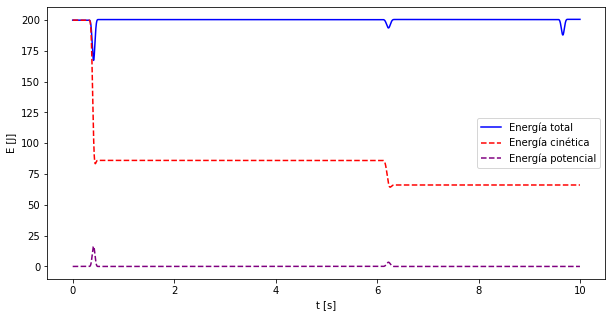

In [34]:
CiEner = Particles[0].CiVec

PoEner = Particles[0].PoVec

ToEner = Particles[0].CiVec + Particles[0].PoVec

for i in range(1, len(Particles)):
    
    CiEnergy = np.add(CiEner, Particles[i].CiVec)
    
    PoEnergy = np.add(PoEner, Particles[i].PoVec)
    
    ToEner = np.add(ToEner, Particles[i].CiVec + Particles[i].PoVec)

var = Particles[0].GetMomentumVector()

for i in range(1, len(Particles)):
    
    var = np.add(var, Particles[i].GetMomentumVector())

fig = plt.figure(figsize = (10, 5))

ax = fig.add_subplot(1,1,1)

ax.plot(t, ToEner, "-", color = "b", label="Energía total")

ax.plot(t, CiEner, "--", color = "r", label="Energía cinética")

ax.plot(t, PoEner,"--", color = "Purple", label="Energía potencial")

ax.set_xlabel("t [s]")
ax.set_ylabel("E [J]")

plt.legend()

In [35]:
def ReduceTime(t,factor):
    
    for p in Particles:
        
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        
        if i%factor == 0:
            
            Newt.append(t[i])
            
    return np.array(Newt)

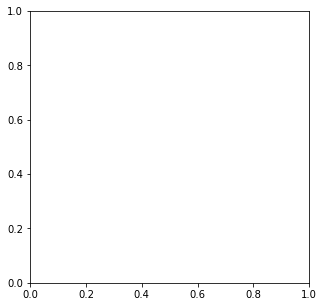

In [36]:
redt = ReduceTime(t,1000)

fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(1,1,1)

In [37]:
def init():
    ax.set_xlim(-Limits[0],Limits[0])
    
    ax.set_ylim(-Limits[1],Limits[1])
    

def Update(i):
    
    plot = ax.clear()
    
    init()
    
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    j= 0
    
    color = ["pink", "Purple", "b"]
    
    for p in Particles:
        
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        vx = p.GetRVelocityVector()[i,0]
        
        vy = p.GetRVelocityVector()[i,1]
        
        circle = plt.Circle( (x,y), p.GetR(), color= color[j], fill=True, label = str(j) )
        plot = ax.add_patch(circle)
        
        plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
        j+=1
        
    plt.xlabel("x [m]")
    plt.ylabel("y [m]")
    
    plt.legend()   
    
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)